## Modified by Julián Ferreiro (jif245)

### fbb skeleton notebook for PUI2017 HW6

In [1]:
#loading packages
from __future__ import print_function, division
import pandas as pd
import pylab as pl
import os
import json
import statsmodels.api as sm



%pylab inline

C:\Users\usuario\Anaconda3\envs\Python2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Populating the interactive namespace from numpy and matplotlib


In [2]:
#reading energy data set from user github account
nrg=pd.read_csv("https://raw.githubusercontent.com/jif245/PUI2017_jif245/master/HW6_jif245/Data/Energy_and_Water_Data_Disclosure_for_Local_Law_84__2013_.csv")

In [3]:
#reading buildings data set from user github account
bsize =pd.read_csv("https://raw.githubusercontent.com/jif245/PUI2017_jif245/master/HW6_jif245/Data/MN.csv")

C:\Users\usuario\Anaconda3\envs\Python2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (19,22,23,25,63,79) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
#Dropping unnnecesary columns and changing name for merge
nrg=nrg[['BBL',"Site EUI(kBtu/ft2)",'Reported Property Floor Area (Building(s)) (ft²)','DOF Property Floor Area (Buildngs and Parking)(ft2)','DOF Number of Buildings']]
#nrg.rename(columns = {'nyc_borough_block_and_lot_bbl':"BBL"}, inplace = True)


In [5]:
nrg.head()

,BBL,Site EUI(kBtu/ft2),Reported Property Floor Area (Building(s)) (ft²),DOF Property Floor Area (Buildngs and Parking)(ft2),DOF Number of Buildings
0,1.000410e+09,NaN,918919,NaN,NaN
1,4.021460e+09,NaN,NaN,82730.0,1.0
2,2.027620e+09,NaN,64200,NaN,NaN
3,1.006700e+09,NaN,NaN,440360.0,1.0
4,2.048300e+09,NaN,50000,NaN,NaN


In [6]:
#Dropping unncesary columns
bsize=bsize[["BBL","UnitsTotal"]]

C:\Users\usuario\Anaconda3\envs\Python2\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


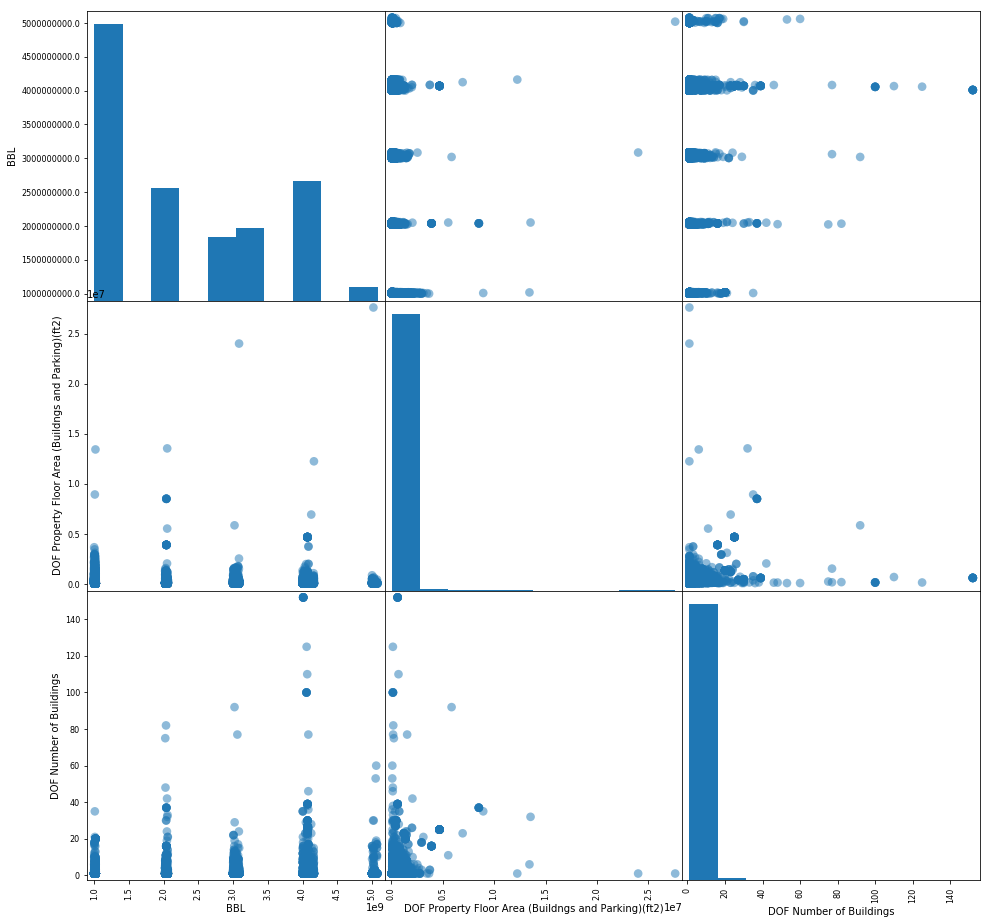

In [7]:
#try make a scatter plot of nrg. Few columns will plot
from pandas.tools.plotting import scatter_matrix
scatter_matrix (nrg, s=300, figsize=(16, 16));

Figure 1: scatter matrix of all numerical values in the files.

Many of the columns are not showing because they cannot be converted to float. A function (from original skeleton notebook) is used to convert all the data to numeric. In case of error, a NaN is created. 

In [8]:
#pd.to_numeric to convert strings to numeric values, 
bsize=bsize.apply(lambda x: pd.to_numeric(x,errors="coerce"))
nrg=nrg.apply(lambda x: pd.to_numeric(x,errors="coerce"))

In [9]:
#after converting to numeric, they are converted to float. 
nrg=nrg.astype(float)
bsize=bsize.astype(float)


In [10]:
#This crecks the number of NaNs
indx = np.isnan(nrg["Site EUI(kBtu/ft2)"]).sum()
print ("invalid entries changed to NaN %d"%sum(indx))


invalid entries changed to NaN 4623


In [11]:
#merging datasets
bblnrgdata = pd.merge(nrg, bsize, on='BBL')


In [12]:
bblnrgdata=bblnrgdata.apply(lambda x: pd.to_numeric(x,errors="coerce"))

In [13]:
bblnrgdata.head()

,BBL,Site EUI(kBtu/ft2),Reported Property Floor Area (Building(s)) (ft²),DOF Property Floor Area (Buildngs and Parking)(ft2),DOF Number of Buildings,UnitsTotal
0,1.006700e+09,NaN,NaN,440360.0,1.0,1.0
1,1.004370e+09,NaN,NaN,52390.0,1.0,4.0
2,1.013110e+09,125.4,330000.0,313200.0,1.0,56.0
3,1.009220e+09,NaN,NaN,98260.0,1.0,148.0
4,1.007400e+09,NaN,68329.0,NaN,NaN,1.0


C:\Users\usuario\Anaconda3\envs\Python2\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


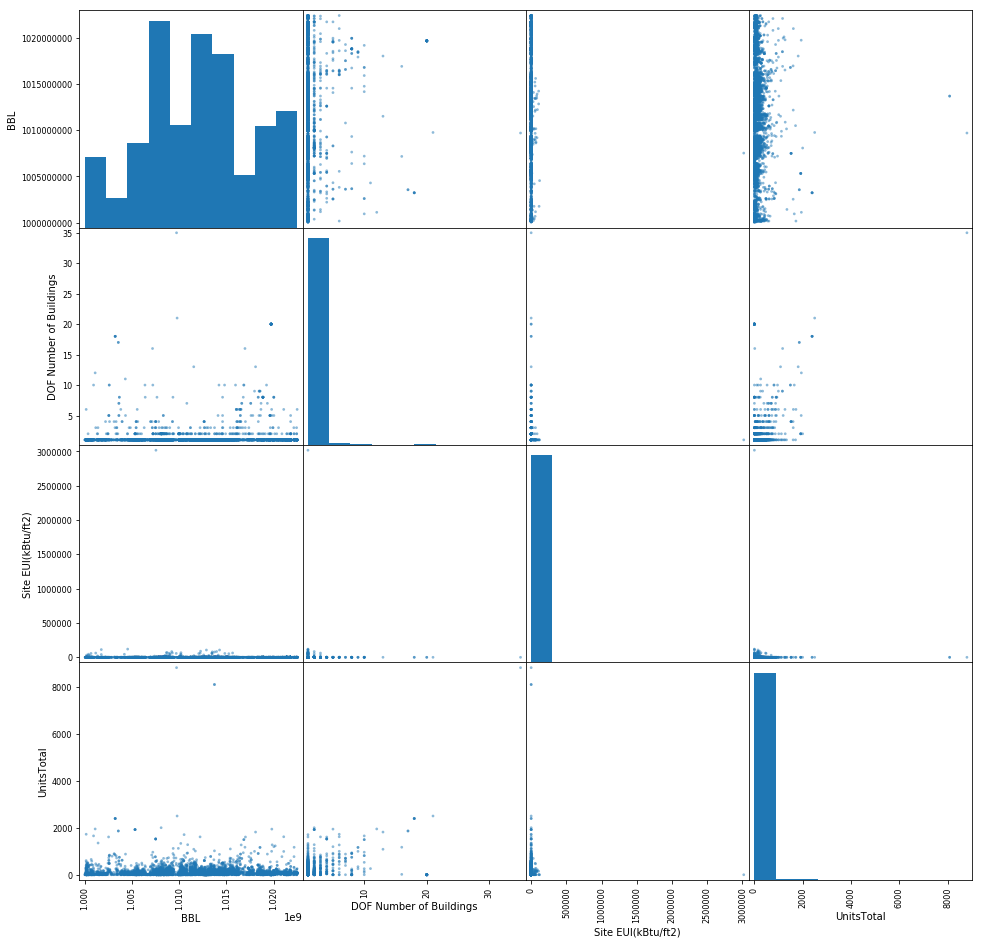

In [14]:
#The columns that were not graphed, can now be graphed
scatter_matrix (bblnrgdata[['BBL','DOF Number of Buildings',"Site EUI(kBtu/ft2)","UnitsTotal"]], s=30, figsize=(16, 16));

Figure 2: scatter matrix of new converted numerical values in the new dataset

Since we want to plot total energy consumption and not per sq feet, we create a new variable/column that is the product of the energy per feet and the reported floor area

In [15]:
#Creating new column "EUI" with the total energy consumption
bblnrgdata["EUI"]=(bblnrgdata["Site EUI(kBtu/ft2)"]*bblnrgdata['Reported Property Floor Area (Building(s)) (ft²)'])

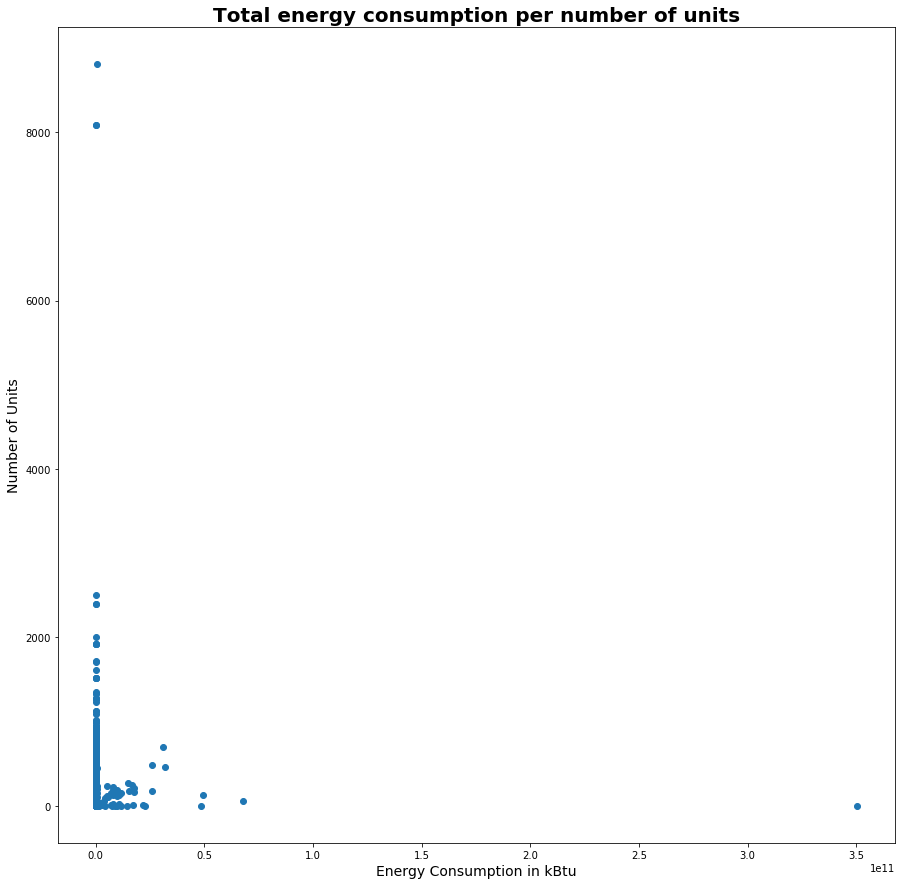

In [16]:
#plotting total energy consumption per number of units
fig=pl.figure(figsize=(15,15))
ax=fig.add_subplot(111)
scatter=ax.scatter(bblnrgdata["EUI"],bblnrgdata["UnitsTotal"])
ax.set_xlabel("Energy Consumption in kBtu",fontsize="14")
ax.set_ylabel("Number of Units",fontsize="14")
plt.title("Total energy consumption per number of units",fontsize="20",fontweight='bold');


Figure 3. The graph is difficult to interpret because there are some outliers that make the scale of the graph to big.

In [17]:
#This could be used to graph only the data that is between the 3 standard deviations. 
#bblnrgdata[np.abs(bblnrgdata[]-df.bblnrgdata.mean())<=(3*df.bblnrgdata.std())]
#bblnrgdata["Site EUI(kBtu/ft2)"][abs(bblnrgdata["Site EUI(kBtu/ft2)"]-bblnrgdata["Site EUI(kBtu/ft2)"].mean())<=(3*bblnrgdata["Site EUI(kBtu/ft2)"].std())]

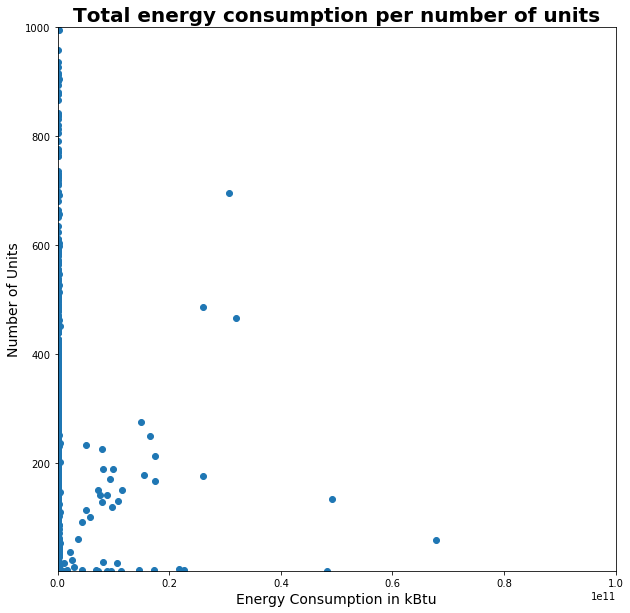

In [18]:
#An easy way to ignore the outliers y to delimit the scale between the values we consider most interesting.
# zoomed in scatter plot
fig=pl.figure(figsize=(10,10))
ax=fig.add_subplot(111)
scatter=ax.scatter(bblnrgdata["EUI"],bblnrgdata["UnitsTotal"])
ax.set_xlabel("Energy Consumption in kBtu",fontsize="14")
ax.set_ylabel("Number of Units",fontsize="14")
plt.title("Total energy consumption per number of units",fontsize="20",fontweight='bold');
xlim((1e3,1e11))
ylim((1,1e3));

Figure 4. Same plot as Figure 3 but zoomed in with an adjustment of the scales.

The points seem to be compressed against the axis. This is a good indication that we should try a log scale.

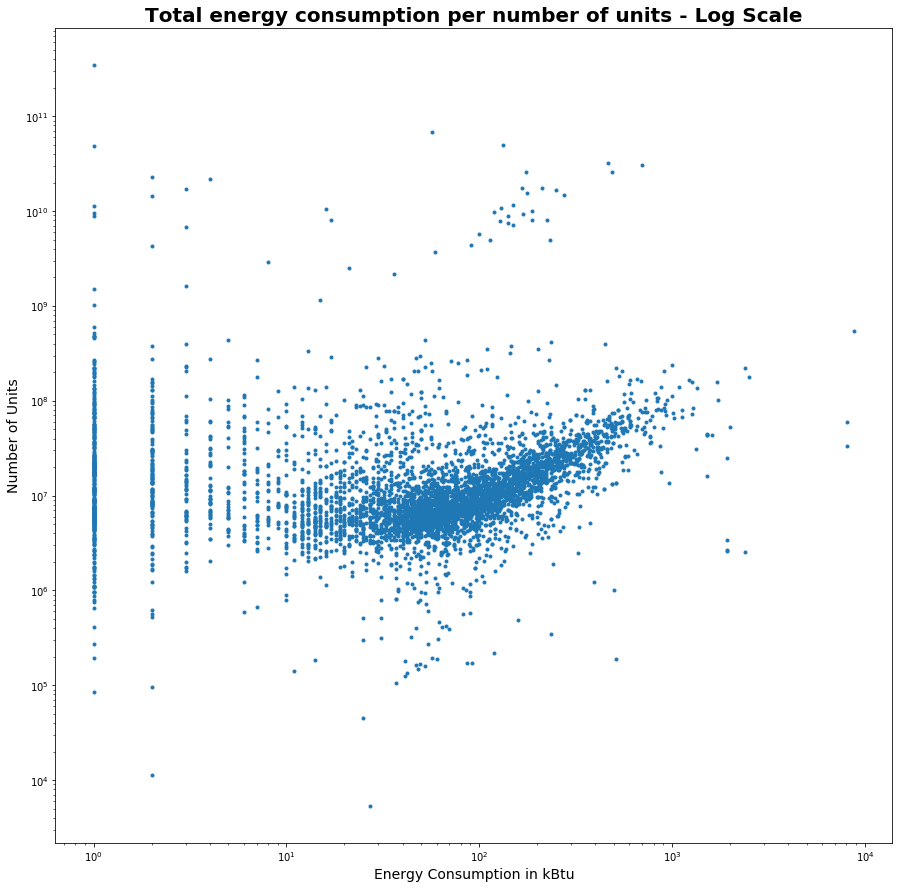

In [19]:
#Trying the plot with a log scale.
fig=pl.figure(figsize=(15,15))
ax=fig.add_subplot(111)
scatter=plt.loglog(bblnrgdata["UnitsTotal"],bblnrgdata["EUI"],".")
ax.set_xlabel("Energy Consumption in kBtu",fontsize="14")
ax.set_ylabel("Number of Units",fontsize="14")
plt.title("Total energy consumption per number of units - Log Scale",fontsize="20",fontweight='bold');

Figure 5. Plot in a log scale. There is a more evident pattern. 

As stated in the skeleton notebook, there are a lot of outliers (0 values and extreme values). 
To have a better time with the data (log is not happy with a lot of 0) the extremes values are removed below

In [20]:
#Removing extreme values and outliers. s 
bblnrgdata_cut = bblnrgdata[(bblnrgdata.EUI > 1000) & (bblnrgdata.UnitsTotal>=10) & (bblnrgdata.UnitsTotal<1000)]
print ("The shape before the removal of outliers is",bblnrgdata.shape)
print ("The shape after the removal of outliers is",bblnrgdata_cut.shape)




The shape before the removal of outliers is (6536, 7)
The shape after the removal of outliers is (4285, 7)


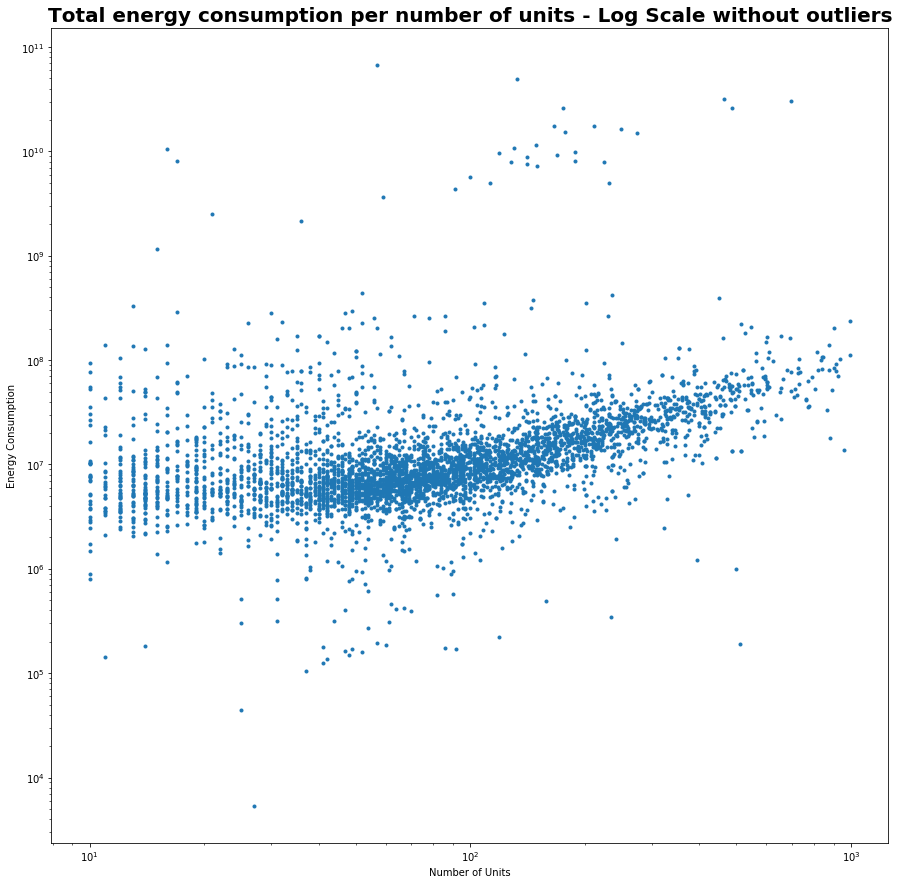

In [21]:
#Trying the plot with a log scale and without outliers.
fig=pl.figure(figsize=(15,15))
ax=fig.add_subplot(111)
scatter=plt.loglog(bblnrgdata_cut["UnitsTotal"],bblnrgdata_cut["EUI"],".")
ax.set_ylabel("Energy Consumption")
ax.set_xlabel("Number of Units");
plt.title("Total energy consumption per number of units - Log Scale without outliers",fontsize="20",fontweight='bold');

Figure 6. Same as Figure 5 without outliers

The log graph shows a linear relation. 
We are going to try to fit the data.

The logical relation would be to consider that the more units, the more energy consumption (the opposite would be that, the more energy we give to a buildings, the more units pop up).
So, the logical relation would be:
Independent variable = Number of units
Dependent variable = Energy Consumption

In [22]:
#Creating a linear model to fit the data were number of units is the independent variable. 

x=bblnrgdata_cut.UnitsTotal
y=bblnrgdata_cut.EUI

X = sm.add_constant(np.log10(x))
linmodel = sm.OLS(np.log10(y), X, missing='drop').fit() 

In [23]:
linmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    EUI   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     827.0
Date:                Mon, 23 Oct 2017   Prob (F-statistic):          1.93e-166
Time:                        14:36:13   Log-Likelihood:                -2605.2
No. Observations:                4285   AIC:                             5214.
Df Residuals:                    4283   BIC:                             5227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.1089      0.033    186.025      0.000       6.045       6.173
UnitsTotal     0.4904      0.017     28.758      0.000       0.457       0.524
==============================================================================
Omnibus:                     2272.854   Durbin-Watson:                   1.668
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            43917.184
Skew:                           2.095   Prob(JB):                         0.00
Kurtosis:                      18.114   Cond. No.                         11.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

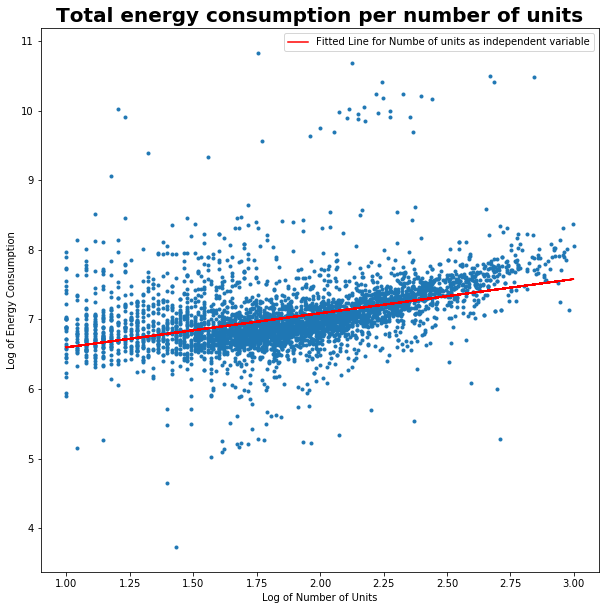

In [24]:
#a graph of the linear fit for the number of units as independent variable
fig=pl.figure(figsize=(10,10))
ax=fig.add_subplot(111)
plot(np.log10(x),np.log10(y),".",label="")
plot(np.log10(x),np.log10(x)*linmodel.params[1]+linmodel.params[0],color="r", label="Fitted Line for Numbe of units as independent variable")
ax.legend()
plt.title("Total energy consumption per number of units" ,fontsize="20",fontweight='bold')
ax.set_ylabel("Log of Energy Consumption")
ax.set_xlabel("Log of Number of Units");

Figure 7.Model Fit for Number of units as independent variable .

In [25]:
#Now we make the model with total energy as independent variable
y1=bblnrgdata_cut.UnitsTotal
x1=bblnrgdata_cut.EUI

X = sm.add_constant(np.log10(x1))
linmodel1 = sm.OLS(np.log10(y1), X, missing='drop').fit() 
linmodel1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             UnitsTotal   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     827.0
Date:                Mon, 23 Oct 2017   Prob (F-statistic):          1.93e-166
Time:                        14:36:14   Log-Likelihood:                -1756.8
No. Observations:                4285   AIC:                             3518.
Df Residuals:                    4283   BIC:                             3530.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4369      0.081     -5.400      0.000      -0.596      -0.278
EUI            0.3300      0.011     28.758      0.000       0.308       0.353
==============================================================================
Omnibus:                      144.802   Durbin-Watson:                   1.387
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.337
Skew:                          -0.457   Prob(JB):                     2.51e-35
Kurtosis:                       3.241   Cond. No.                         104.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Note that the R**2 has the same value as before. 

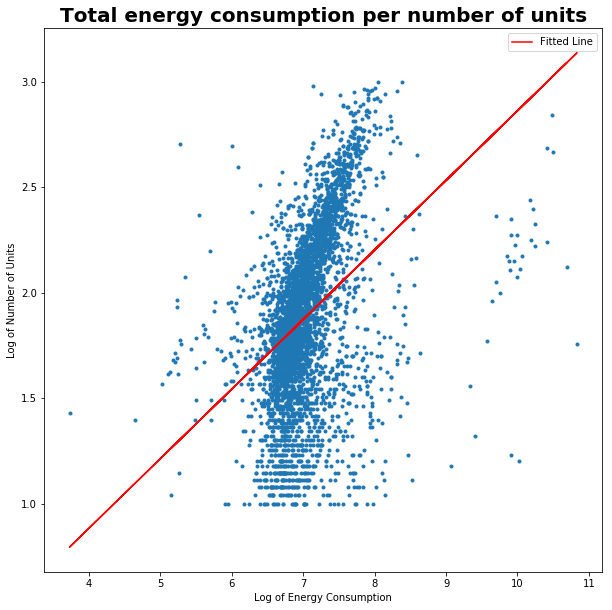

In [26]:
#a graph of the linear fit for the energy as independent variable
fig=pl.figure(figsize=(10,10))
ax=fig.add_subplot(111)
plot(np.log10(x1),np.log10(y1),".",label="")
plot(np.log10(x1),linmodel1.predict(),color="r", label="Fitted Line")
ax.legend()
plt.title("Total energy consumption per number of units" ,fontsize="20",fontweight='bold')
ax.set_xlabel("Log of Energy Consumption")
ax.set_ylabel("Log of Number of Units");

Figure 8. Model fit for energy as independent variable.

We are now going try to measure which model better explains the data.
For doing this, we calculate the chi square of each model, considering the errors as poisson distribution: since we are counting physical units, the poisson distribution is the least we can consider for the errors.


In [70]:
#For the units as independent variable
resid_u=linmodel.predict()-np.log10(y)
error_u=np.sqrt(np.log10(y))

chi_u=((resid_u**2)/error_u).sum()
                

In [71]:
#For the energy as independent variable
resid_e=linmodel1.predict()-np.log10(y1)
error_e=np.sqrt(np.log10(y1))

chi_e=((resid_e**2)/error_e).sum()

In [72]:
print ("The number of units as independent variable has a chi square of",chi_u)
print ("The energy as independent variable has a chi square of",chi_e)

The number of units as independent variable has a chi square of 305.766392319
The energy as independent variable has a chi square of 444.023303402


That was a manual way to calculate it considering the errors as a poisson distribution. But this is not correct. Since the total energy was obtained with a mathematical operation, we need to propagate the errors to account for both the erros in square feet and energy measure. I'm using the function provided in the skeleton notebook

In [30]:
def chi2(data, model, errors = None):
    '''Calculates the chi sq given data, model and errors
    Arguments:
    data: series of datapoints (endogenous variable)
    model: series of predicted values corresponding to the observed data
    errors: serie of errors (optional). 
    If errors are not passes all errors are set to 1
    '''
    if errors is None:
        errors = np.ones_like(data)
    if data.shape == model.shape and data.shape == errors.shape:
        return (((data - model)**2) / errors**2).sum()
    else: 
        print ('''ERROR:
must pass arrays of identical dimension for data, model and (optional) error)''')
    return -1

In [61]:
## Assume that there is error in the reported energy. 
## but that is the product of two measured qusntities, each of which will have errors. 
## The minimum error is the squareroot of the value

#Below I am writing out some uncertainties - please explain the functional form that I used.
#errors on the measured quantities
errorsnrg = np.sqrt((bblnrgdata_cut['Reported Property Floor Area (Building(s)) (ft²)'])**2 +\
                (bblnrgdata_cut['Site EUI(kBtu/ft2)']**2))

## Assume count statistics in the number of units as well
errorsunits = np.sqrt(bblnrgdata_cut.UnitsTotal)

#These errors need to be propagated properly through the log

In [44]:
errorsInLogNrg = np.abs(errorsnrg / bblnrgdata_cut.EUI / np.log(10))
errorsInLogUnits = np.abs(errorsunits / bblnrgdata_cut.UnitsTotal / np.log(10))

bblnrgdata_cut['errorsnrg'] = errorsInLogNrg
bblnrgdata_cut['errorsunits'] = errorsInLogUnits

C:\Users\usuario\Anaconda3\envs\Python2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\usuario\Anaconda3\envs\Python2\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [79]:
chi_u1=(chi2(np.log10(y), linmodel.predict(),errorsInLogUnits))
chi_e1=(chi2(np.log10(y1), linmodel1.predict(),errorsInLogNrg))

In [81]:
print ("After propagation of erros:")
print ("The number of units as independent variable has a chi square of",chi_u1)
print ("The energy as independent variable has a chi square of",chi_e1)


After propagation of erros:
The number of units as independent variable has a chi square of 549401.60011
The energy as independent variable has a chi square of 233839561427.0


Since both have the same degrees of freedom, units as independent variable has a lower chi square, meaning that the distance from the model to the points weighted by the error is smaller, meaning that it is a slighlty better model.

Since the two models are not nested (one does not contain the other, they have the same number of parameters) we **cannot** compare them with the LR test.

In [32]:
#building a cuadratic fit using number of units as independent variable
import statsmodels.formula.api as smf

cuadmodel=smf.ols(formula="log10(y)~I(log10(x)**2)+log10(x)",data=bblnrgdata_cut).fit()
cuadmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               log10(y)   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     612.9
Date:                Mon, 23 Oct 2017   Prob (F-statistic):          8.24e-235
Time:                        14:36:15   Log-Likelihood:                -2444.1
No. Observations:                4285   AIC:                             4894.
Df Residuals:                    4282   BIC:                             4913.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            8.0731      0.112     72.104      0.000       7.854       8.293
I(log10(x) ** 2)     0.5682      0.031     18.288      0.000       0.507       0.629
log10(x)            -1.6706      0.119    -14.003      0.000      -1.905      -1.437
==============================================================================
Omnibus:                     2423.017   Durbin-Watson:                   1.719
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            57853.466
Skew:                           2.219   Prob(JB):                         0.00
Kurtosis:                      20.445   Cond. No.                         115.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

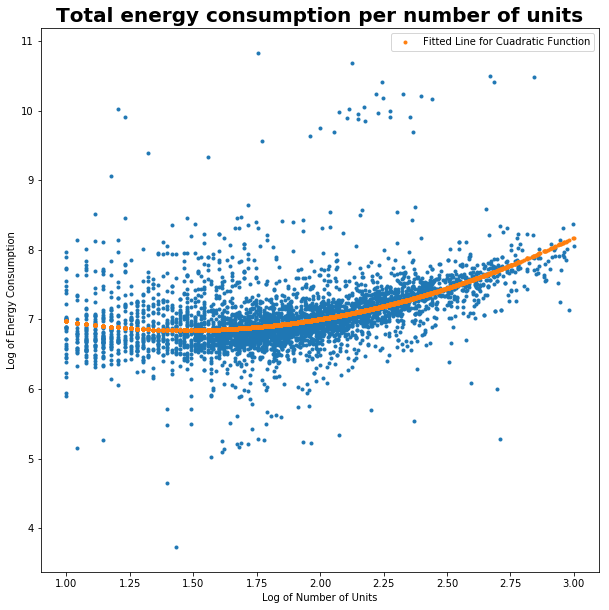

In [33]:
#a graph of the linear fit for the number of units as independent variable
fig=pl.figure(figsize=(10,10))
ax=fig.add_subplot(111)
plot(np.log10(x),np.log10(y),".",label="")
plot(np.log10(x),cuadmodel.predict(),".", label="Fitted Line for Cuadratic Function")
ax.legend()
plt.title("Total energy consumption per number of units" ,fontsize="20",fontweight='bold')
ax.set_ylabel("Log of Energy Consumption")
ax.set_xlabel("Log of Number of Units");

Figure 9. Cuadratic Model fit for Number of Units Independent Variable.

Now that we have a model that is more complex that the previous linear one, we can use LR to compare them as follow:

In [34]:
#using LR to compare both models
print ("LR : ", -2 * (-linmodel.llf - (-cuadmodel.llf)))
print ("LR from statsmodels:", cuadmodel.compare_lr_test(linmodel))

LR :  -322.251327135
LR from statsmodels: (322.25132713541188, 4.6829415120284197e-72, 1.0)


The Chi Square value is over the critical value of 3.84 for 1 degree of freedom (the difference in DF from the two models).
We reject the Null Hypothesis (p-value under 0.05) that the simpler model is equal or better than the complex model. 
The simpler model is NOT equal or better than the complex model, therefore, **the cuadratic model is a better model than the linear**.

